[**Demo %s**](#demo-pwlin-converge)

We measure the convergence rate for piecewise linear interpolation of $e^{\sin 7x}$ over $x \in [0,1]$.

In [2]:
f = x -> exp(sin(7x))
x = range(0, 1, 10001)  # sample the difference at many points
n = @. round(Int, 10^(1:0.25:3.5))
maxerr = zeros(length(n))
for (k, n) in enumerate(n)
    t = (0:n) / n    # interpolation nodes
    p = FNC.plinterp(t, f.(t))
    err = @. f(x) - p(x)
    maxerr[k] = norm(err, Inf)
end

data = (n=n[1:4:end], err=maxerr[1:4:end])
@pt :header=["n", "max-norm error"] data

n,max-norm error
10,0.150471
100,0.00166421
1000,1.66494e-5


As predicted, a factor of 10 in $n$ produces a factor of 100 in the error. In a convergence plot, it is traditional to have $h$ *decrease* from left to right, so we expect a straight line of slope $-2$ on a log-log plot.

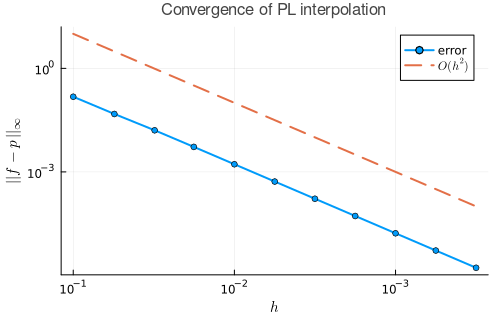

In [3]:
h = @. 1 / n
order2 = @. 10 * (h / h[1])^2

plot(h, maxerr, m=:o, label="error", xflip=true)
plot!(h, order2;
    l=:dash,  label=L"O(h^2)",
    xaxis=(:log10, L"h"),  yaxis=(:log10, L"|| f-p\, ||_\infty"),
    title="Convergence of PL interpolation")